<h1 style="text-align:center;">Лабораторная работа №6</h1>

<h2 style="text-align:center;">Решение системы однородных дифференциальных уравнений</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>

In [112]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

Цель: решить выбранную задачу перечисленными методами:

1) Явные методы Рунге-Кутта 1 - 4 порядка

2) Явные методы Адамса  2 - 4 порядка

3) Явные методы Формулы Дифференцирования Назад 2 - 4 порядка   

     


<img src="images\task.png" alt="drawing" width="750"/>

In [135]:
t_start = 0
t_stop = 20
Y0 = [0.5,  0,    0,    np.sqrt(3)]
#     x(0)  y(0)  z(0)  u(0)

In [136]:
def f(t, Y):
    x, y, z, u = Y
    r = (x**2 + y**2)**1.5
    return [z, u, -x / r, -y / r]


### **Явные методы Рунге-Кутта 1-4 порядка**

АристоваЛобанов-1 стр206-210

https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты

Явные методы Рунге–Кутты являются одношаговыми –– для построения решения на данном шаге необходимо знать только искомые значения
на предыдущем.   

<img src="images\runge_kutt.png" alt="drawing" width="700"/>

In [115]:
def runge_kutt(f, t, Y, h, order):
    l = len(Y)
    if order == 1:
        k1 = f(t, Y)
        return [ (Y[i] + h * k1[i])  for i in range(l)]
    
    elif order == 2:
        k1 = f(t, Y)
        Y_pred = [Y[i] + h * k1[i] for i in range(l)]  # прогноз
        k2 = f(t + h, Y_pred)
        return [Y[i] + h * (k1[i] + k2[i]) / 2 for i in range(l)]
    
    elif order == 3:
        k1 = f(t, Y)
        Y_pred_12 = [Y[i] + h * k1[i] / 2 for i in range(l)]
        k2 = f(t + h/2, Y_pred_12)
        Y_pred_23 =  [Y[i] - h * k1[i] + 2 * h * k2[i] for i in range(l)]
        k3 = f(t + h, Y_pred_23)
        return [Y[i] + h * (k1[i] + 4*k2[i] + k3[i]) / 6 for i in range(l)]
    
    elif order == 4:
        k1 = f(t, Y)
        Y_pred_12 = [Y[i] + h * k1[i] / 2 for i in range(l)]
        k2 = f(t + h / 2, Y_pred_12)
        Y_pred_23 = [Y[i] + h * k2[i] / 2 for i in range(l)]
        k3 = f(t + h / 2, Y_pred_23)
        Y_pred_34 = [Y[i] + h * k3[i] for i in range(l)]
        k4 = f(t + h, Y_pred_34)
        return [Y[i] + h * (k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) / 6 for i in range(l)]
    
    else:
        print("ERROR! Порядок должен быть от 1 до 4")
        return 

In [116]:
def integrate_runge_kutt(f, Y0, t_start, t_stop, h, order):
    t = t_start
    Y = Y0[:]
    S = [[t] + Y] 

    while t < t_stop:
        Y = runge_kutt(f, t, Y, h, order)
        t += h
        S.append([t] + Y)

    return S #траектория

In [117]:
def drawing_runge_kutta(order):
    h_vals = [10 ** i for i in range (-5, 1)]
    x_vals = [0]*6
    y_vals = [0]*6

    for i in range(len(h_vals)):
        S = integrate_runge_kutt(f, Y0, t_start, t_stop, h_vals[i], order)
        x_vals[i] = [p[1] for p in S]
        y_vals[i] = [p[2] for p in S]
        #plt.title(f'Траектория движения спутника: (РК1), шаг = {h}')

    fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 строки, 3 столбца

    axs = axs.flatten()  # чтобы обращаться как axs[0], axs[1], ...

    for i in range(len(h_vals)):
        axs[i].plot(x_vals[i], y_vals[i])
        axs[i].set_title(f"Шаг h = {h_vals[i]}")
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].axis('equal')  # чтобы не искажалась орбита
        axs[i].grid(True)

    fig.suptitle(f"Методы Рунге-Кутта {order} порядка", fontsize=16)
    plt.tight_layout()
    plt.show()

#### **РК1**
**(Метод Эйлера)**

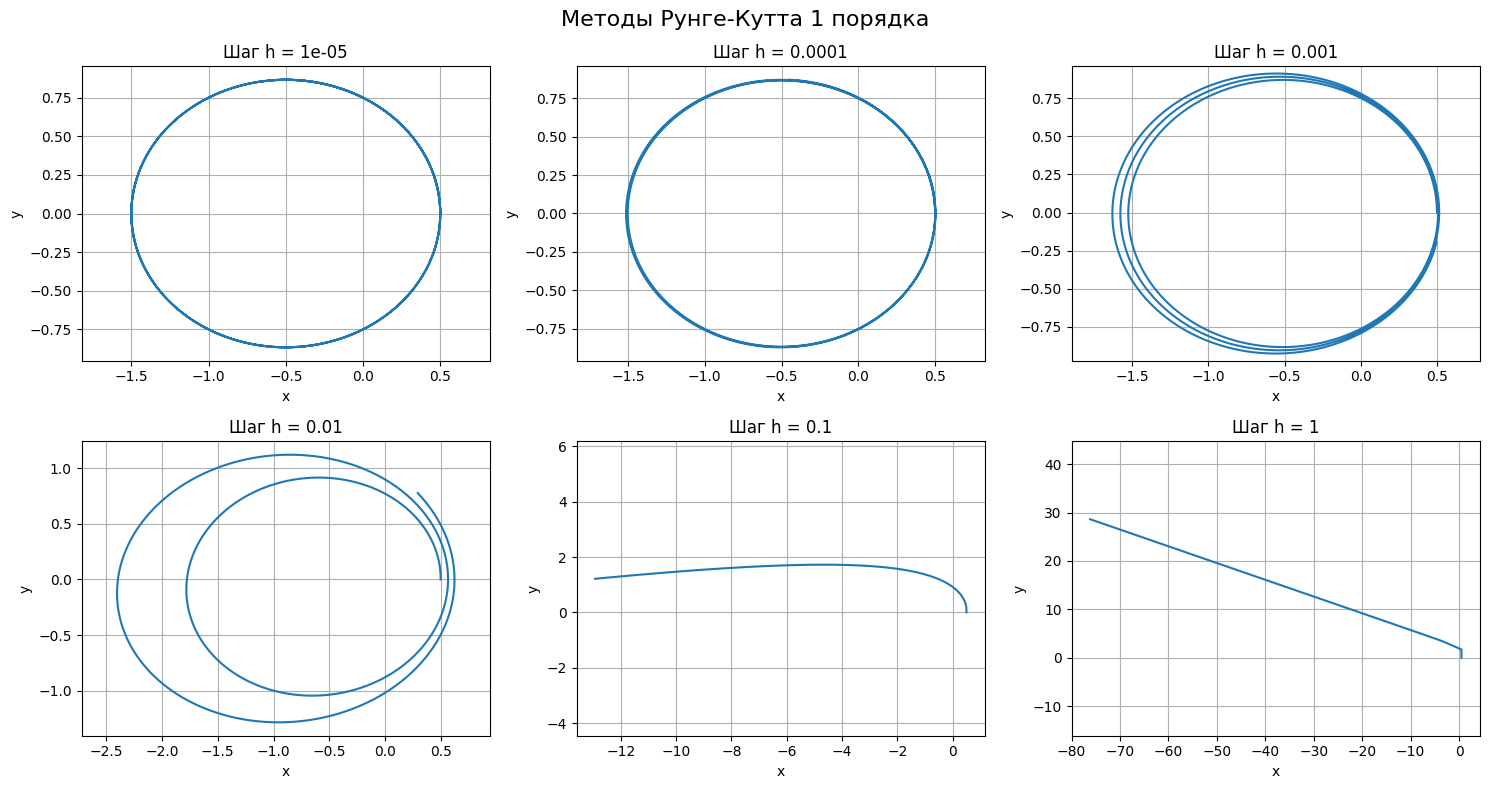

In [118]:
drawing_runge_kutta(order = 1)

Метод Эйлера (РК1) имеет:   
-первый порядок точности,   
-очень плохую устойчивость для "долгоиграющих" задач типа орбиты,    
-он не сохраняет энергию, поэтому со временем «вылезает» с орбиты    

На последнем графике траектория не замкнута - спутник уходит от планеты или, наоборот, падает на нее - т к шаг выбран слишком большой.
Для оценки минимального значения шага посчитаем отношение $\lambda_{max}/\lambda_{min}$ - собственных значений матрицы. Чтобы получить саму матрицу, линеаризуем исходные уравнения возле начальной точки:  
$$
J =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
16 & 0 & 0 & 0 \\
0 & -8 & 0 & 0 
\end{bmatrix}
$$

$\lambda_{1, 2} = \pm 4$, $\lambda_{3, 4} = \pm 2\sqrt2\mathrm{i}$,

Тогда  $h_{max} < |\lambda_{max}/\lambda_{min}| = 0,7$

#### **РК2**
**(модифицированный Эйлер / метод трапеций)**

Вместо одного наклона, мы:    
* Сначала вычисляем k1 — наклон в начале отрезка.   
* Строим прогноз Y2 — куда попадём, если шагнем по этому наклону.
* Считаем k2 — наклон в конце отрезка (в прогнозной точке).   
* Берём среднее k1 и k2 — это «средний наклон» на отрезке.   


1. Первый наклон:
$$
k_1 = f(t_n, y_n)
$$

2. Второй наклон (в конце шага):
$$
k_2 = f(t_n + h, \ y_n + h k_1)
$$

3. Обновление значения:
$$
y_{n+1} = y_n + \frac{h}{2}(k_1 + k_2)
$$

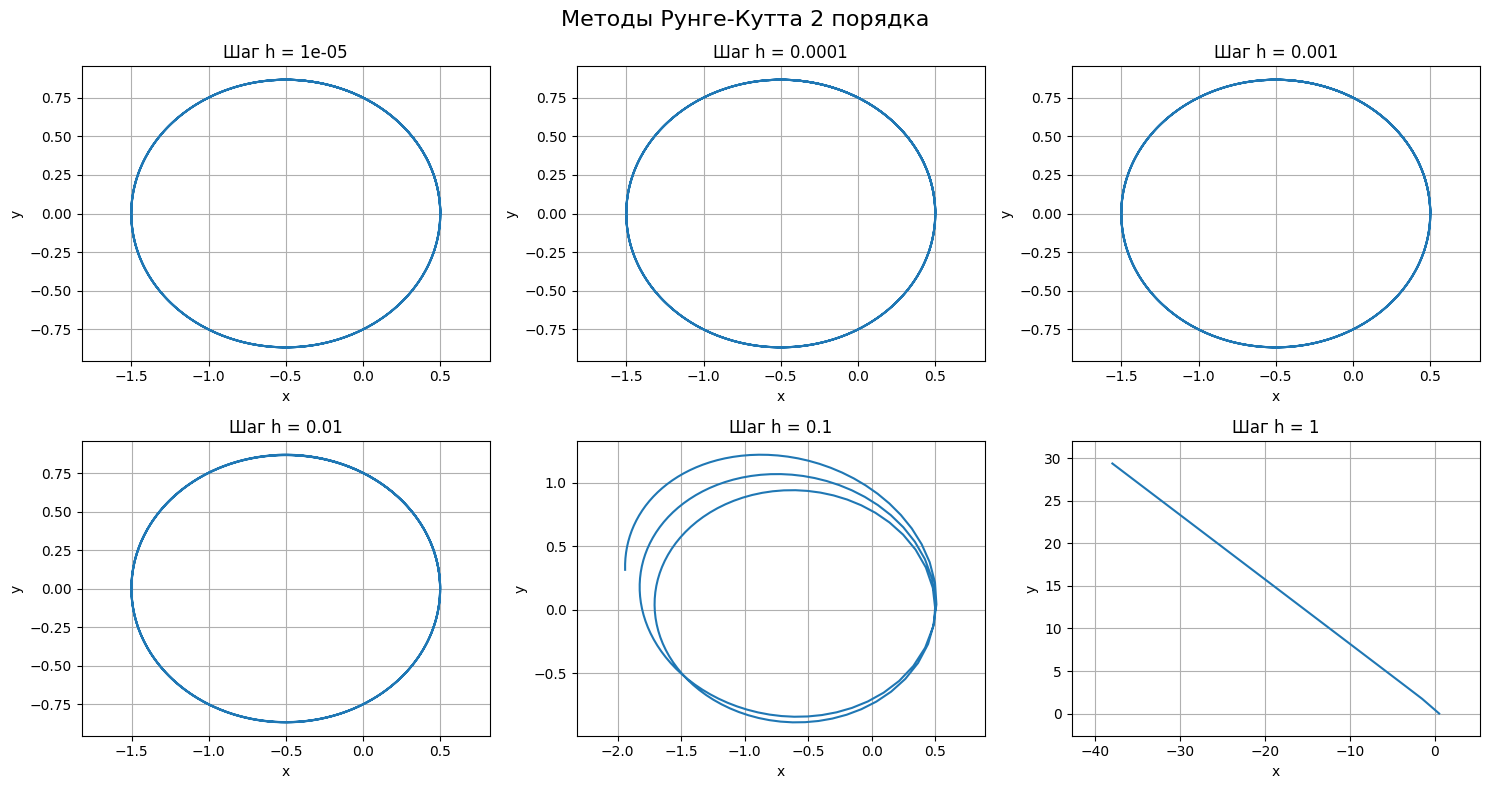

In [119]:
drawing_runge_kutta(order = 2)

#### **РК3** 

1. Первый наклон:
$$
k_1 = f(t_n, y_n)
$$

2. Второй наклон (в середине шага):
$$
k_2 = f\left(t_n + \frac{h}{2}, \ y_n + \frac{h}{2}k_1\right)
$$

3. Третий наклон (в конце шага, с поправкой):
$$
k_3 = f(t_n + h, \ y_n - h k_1 + 2h k_2)
$$

4. Обновление значения:
$$
y_{n+1} = y_n + \frac{h}{6}(k_1 + 4k_2 + k_3)
$$

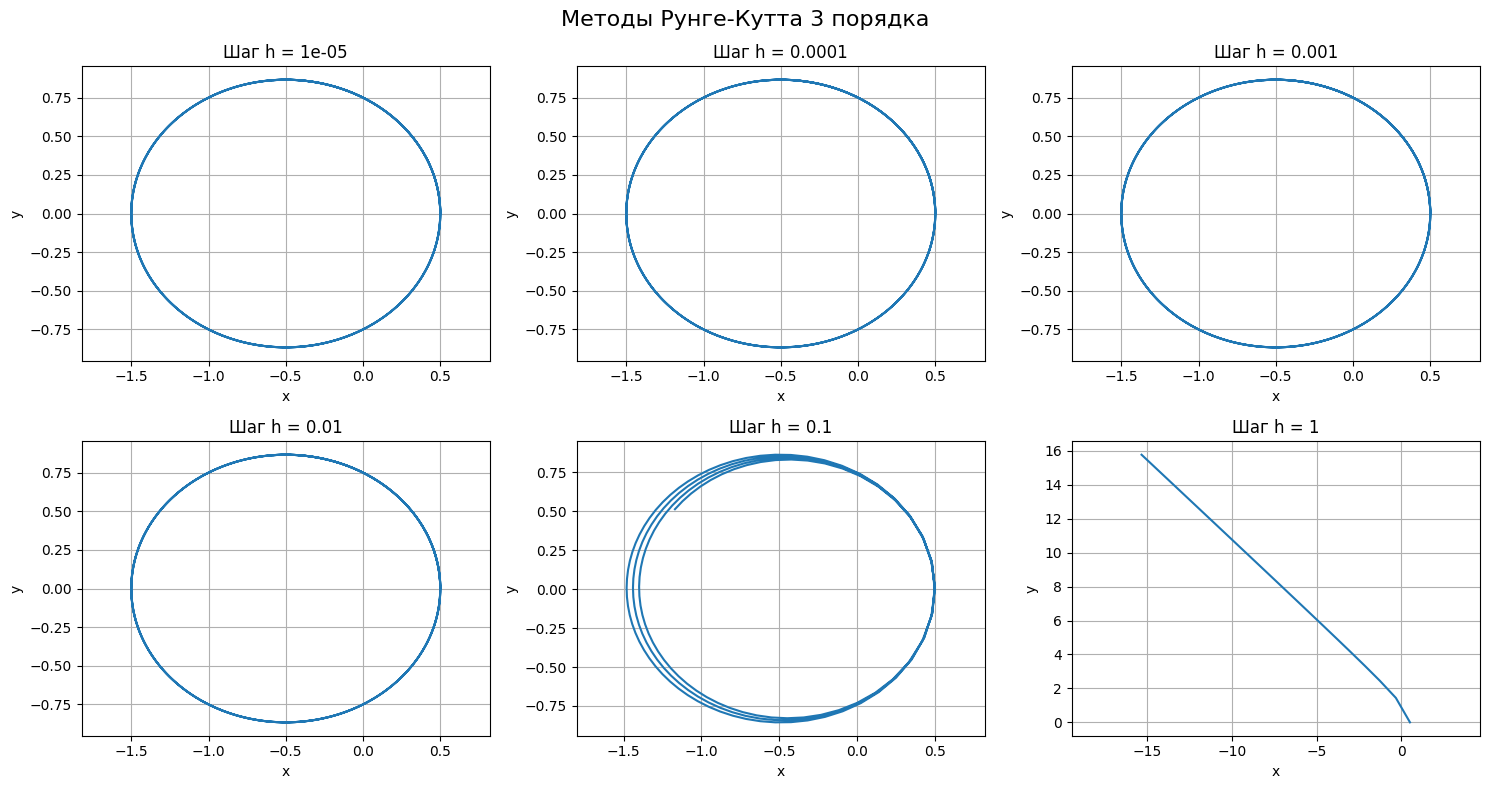

In [120]:
drawing_runge_kutta(order = 3)

#### РК4  

1. Первый наклон:
$$
k_1 = f(t_n, y_n)
$$

2. Второй наклон:
$$
k_2 = f\left(t_n + \frac{h}{2}, \ y_n + \frac{h}{2}k_1\right)
$$

3. Третий наклон:
$$
k_3 = f\left(t_n + \frac{h}{2}, \ y_n + \frac{h}{2}k_2\right)
$$

4. Четвёртый наклон:
$$
k_4 = f(t_n + h, \ y_n + h k_3)
$$

5. Обновление значения:
$$
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

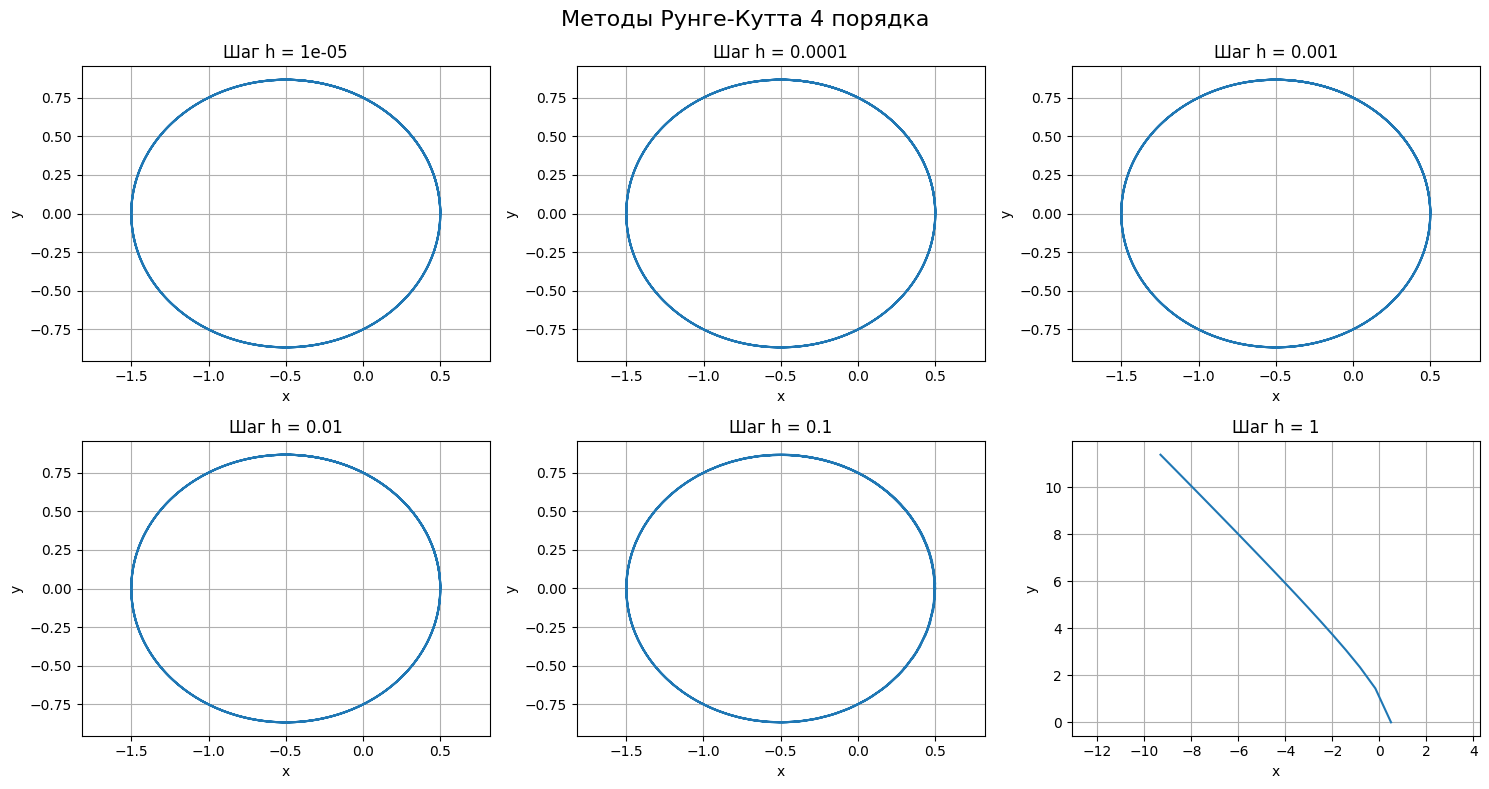

In [121]:
drawing_runge_kutta(order = 4)

#### **Сравнение РК1 и РК4**

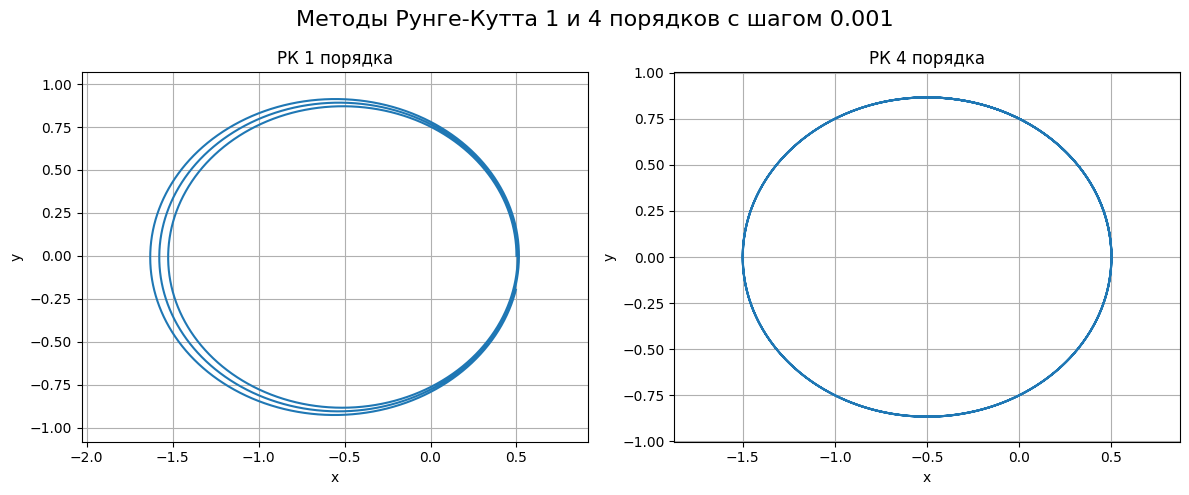

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 графика

h =  0.001

S1 = integrate_runge_kutt(f, Y0, t_start, t_stop, h, order=1)
x1 = [p[1] for p in S1]
y1 = [p[2] for p in S1]
axs[0].plot(x1, y1)
axs[0].set_title("РК 1 порядка")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].axis('equal')
axs[0].grid(True)

S4 = integrate_runge_kutt(f, Y0, t_start, t_stop, h, order=4)
x4 = [p[1] for p in S4]
y4 = [p[2] for p in S4]
axs[1].plot(x4, y4)
axs[1].set_title("РК 4 порядка")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].axis('equal')
axs[1].grid(True)

fig.suptitle(f"Методы Рунге-Кутта 1 и 4 порядков с шагом {h}", fontsize=16)

plt.tight_layout()
plt.show()


### **Явные методы Адамса 2-4 порядка (Адамса-Башфорта)**

https://ru.wikipedia.org/wiki/Метод_Адамса

**Сравнение с РК**     
Эти методы являются многошаговыми и одностадийными   
+: быстрее (1 вызов f вместо 4)

-: неустойчивость на больших шага;     
-: требует разгон     
-:требует хранение истории 

<img src="images\adams.png" alt="drawing" width="650"/> 

In [131]:
def adams(f_vals, y_curr, h, order):
    # f_vals — список прошлых значений правой части (f), начиная с текущего: [f_n, f_{n-1}, f_{n-2}, ...]
    if order == 2:
        coeffs = [3/2, -1/2]
    elif order == 3:
        coeffs = [23/12, -16/12, 5/12]
    elif order == 4:
        coeffs = [55/24, -59/24, 37/24, -9/24]
    else:
        print("ERROR! Порядок должен быть от 2 до 4")
        return 
    y_next = [   y_curr[i] + h * sum(coeffs[j] * f_vals[j][i] for j in range(len(coeffs)))            for i in range(len(y_curr)) ]

    return y_next

<img src="images\adams_.png" alt="drawing" width="650"/> 

In [132]:
# Интегратор Адамса с разгонным участком
def integrate_adams(f, Y0, t_start, t_stop, h, order):
    steps = int((t_stop - t_start) / h)
    t = t_start
    Y_hist = [Y0] # список последних значений решения
    f_hist = [f(t_start, Y0)]
    times = [t_start]
    
    # Разгон - через РК4
    for _ in range(order - 1): # Выполняем order-1 шагов Рунге–Кутты 4-го порядка
        Y_next = runge_kutt(f, t, Y_hist[-1], h, order=4)
        t += h
        Y_hist.append(Y_next)
        f_hist.append(f(t, Y_next))
        times.append(t)

    S = [[times[i]] + Y_hist[i] for i in range(order)] # траектория

    for _ in range(steps - (order - 1)):
        f_vals = f_hist[::-1] # чтобы было от последнего к первому
        y_curr = Y_hist[-1]
        y_next = adams(f_vals, y_curr, h, order)

        t += h
        f_next = f(t, y_next) # новое значение производной 

        times.append(t)
        S.append([t] + y_next) # сохраняем точку в траекторию

        Y_hist.append(y_next)
        f_hist.append(f_next)
        
        #храним лишь последние order штук для следующего шага
        Y_hist = Y_hist[-order:] 
        f_hist = f_hist[-order:]

    return S

In [133]:
def drawing_adams(order):
    h_vals = [10 ** i for i in range (-5, 1)]
    x_vals = [0]*6
    y_vals = [0]*6

    for i in range(len(h_vals)):
        S = integrate_adams(f, Y0, t_start, t_stop, h_vals[i], order)
        x_vals[i] = [p[1] for p in S]
        y_vals[i] = [p[2] for p in S]
        #plt.title(f'Траектория движения спутника: (РК1), шаг = {h}')

    fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 строки, 3 столбца

    axs = axs.flatten()  # чтобы обращаться как axs[0], axs[1], ...

    for i in range(len(h_vals)):
        axs[i].plot(x_vals[i], y_vals[i])
        axs[i].set_title(f"Шаг h = {h_vals[i]}")
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].axis('equal')  # чтобы не искажалась орбита
        axs[i].grid(True)

    fig.suptitle(f"Методы Адамса {order} порядка", fontsize=16)
    plt.tight_layout()
    plt.show()

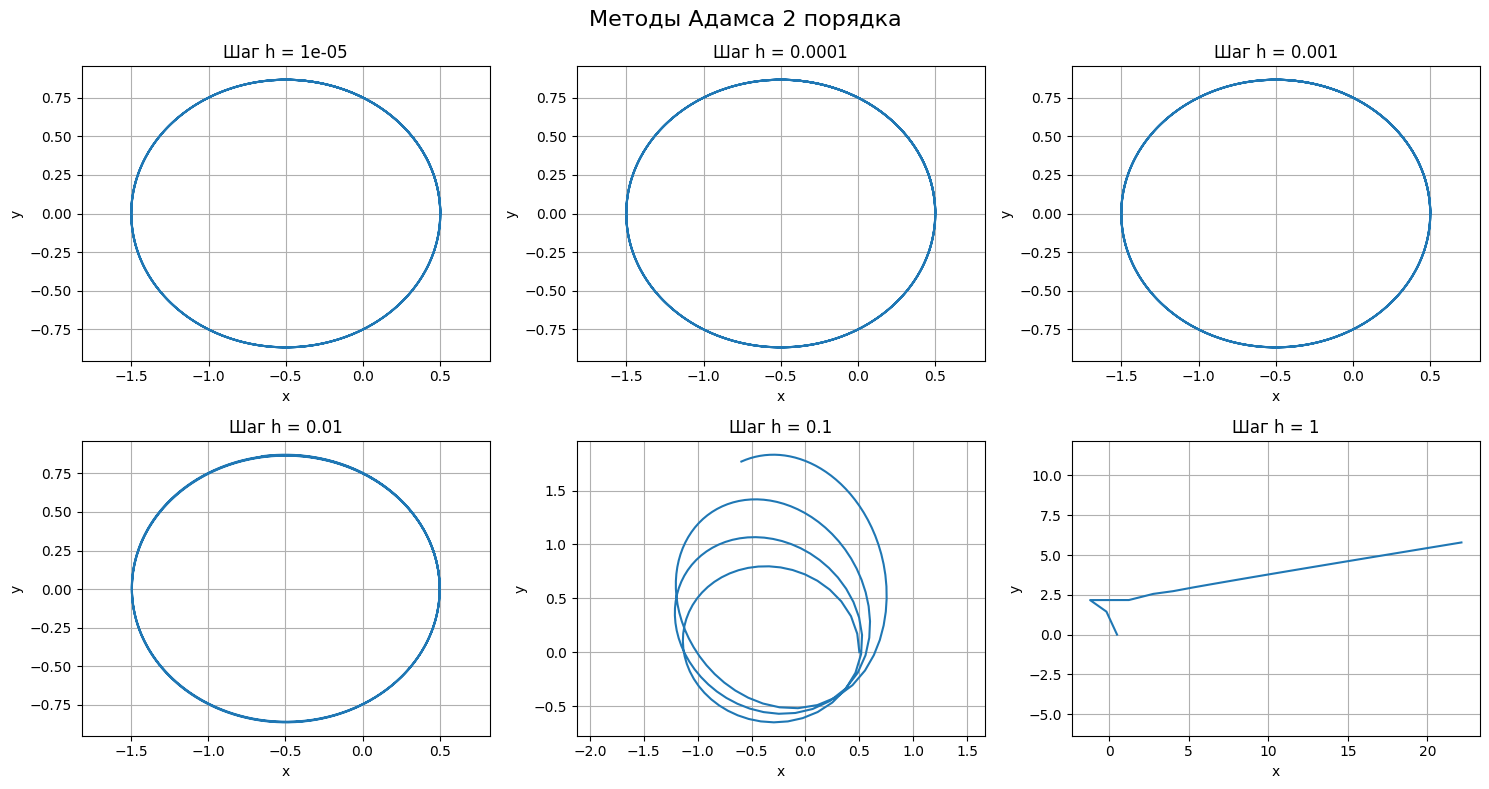

In [126]:
drawing_adams(order = 2)

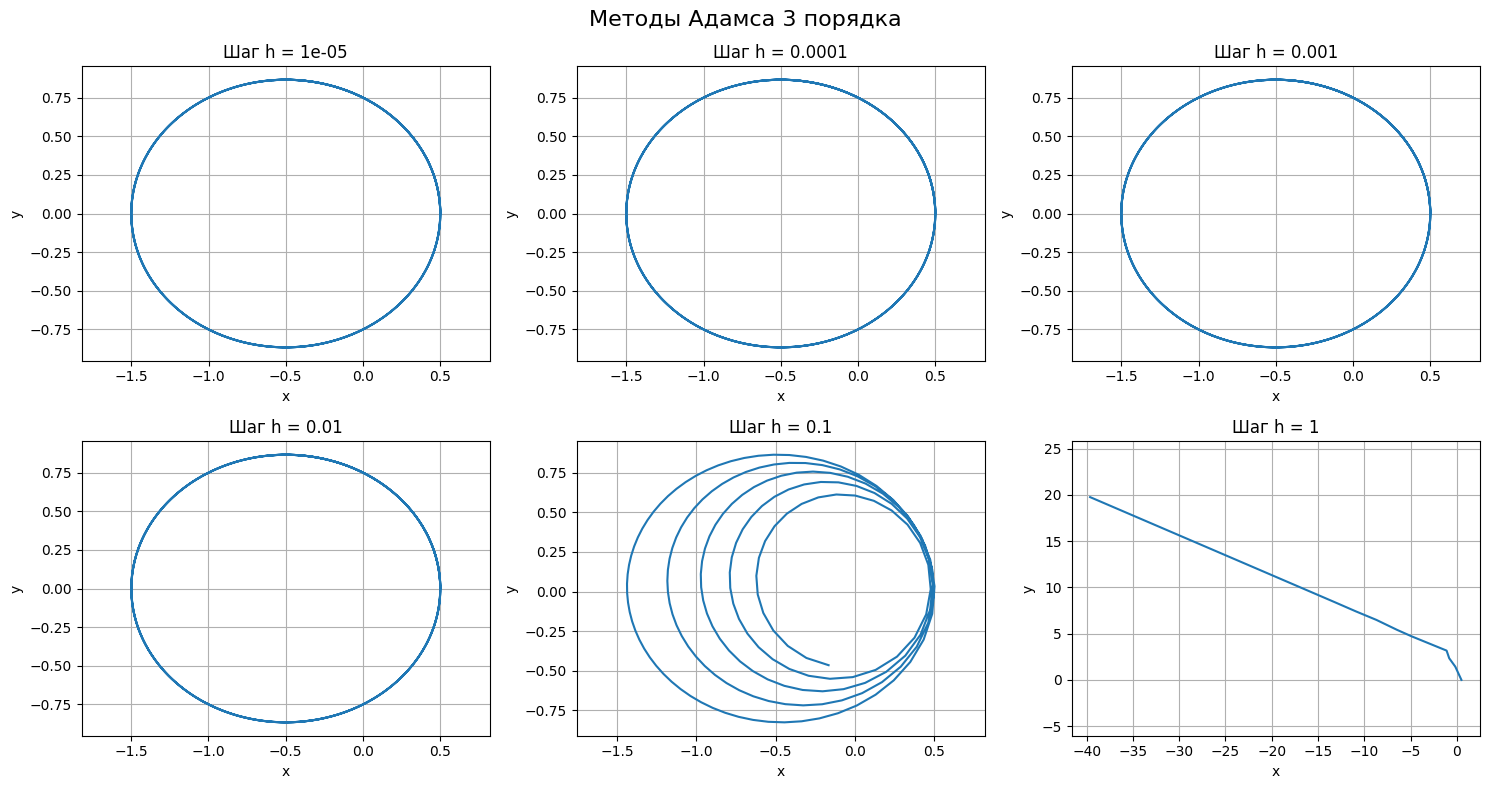

In [127]:
drawing_adams(order = 3)

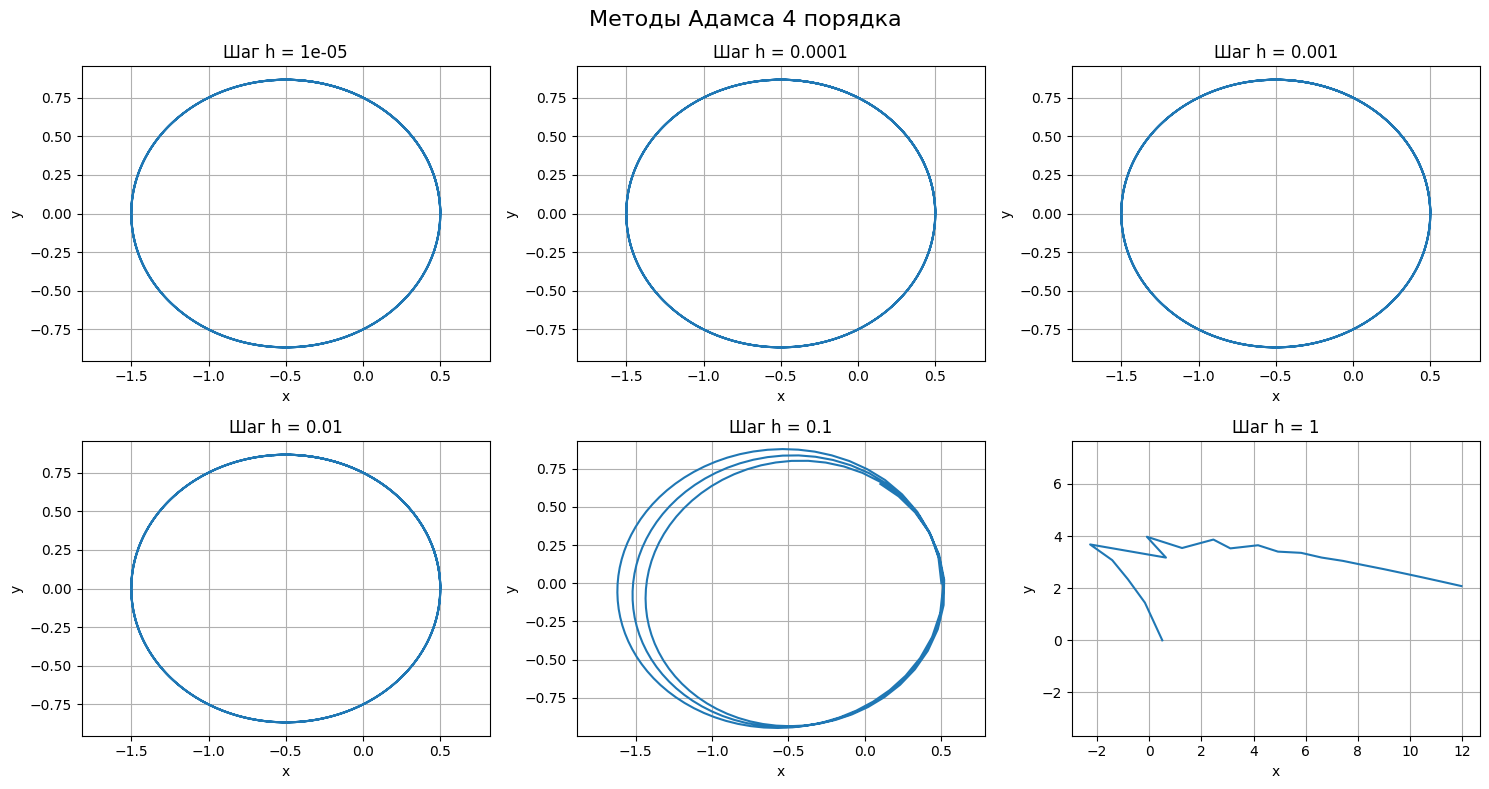

In [128]:
drawing_adams(order = 4)

Чем выше порядок метода Адамса — тем дольше он остаётся точным при большом шаге h.

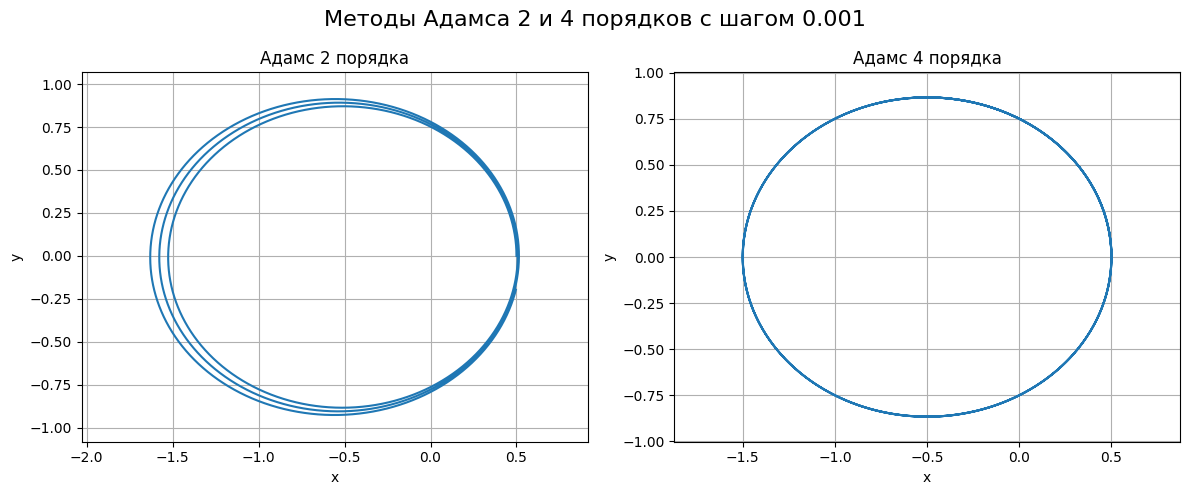

In [138]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 строка, 2 графика

h =  0.001

S2 = integrate_adams(f, Y0, t_start, t_stop, h, order=2)
x1 = [p[1] for p in S1]
y1 = [p[2] for p in S1]
axs[0].plot(x1, y1)
axs[0].set_title("Адамс 2 порядка")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].axis('equal')
axs[0].grid(True)

S4 = integrate_adams(f, Y0, t_start, t_stop, h, order=4)
x4 = [p[1] for p in S4]
y4 = [p[2] for p in S4]
axs[1].plot(x4, y4)
axs[1].set_title("Адамс 4 порядка")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].axis('equal')
axs[1].grid(True)

fig.suptitle(f"Методы Адамса 2 и 4 порядков с шагом {h}", fontsize=16)

plt.tight_layout()
plt.show()

### **Явные методы ФДН 2-4 порядка**

Backward differentiation formula
